In [35]:
import numpy as np
from pathlib import Path
import torch
from rasterio.plot import show
import matplotlib.pyplot as plt

In [3]:
root = Path(r"C:\Users\Fabian\Documents\Github_Masterthesis\Solarpark-detection\data_local\refactored_images_test_color_corrected")

In [4]:
image = torch.load(root / '33UVP_47_2018-10-13.pt')

In [5]:
image.shape

torch.Size([4, 256, 124])

In [6]:
image.dtype

torch.float32

In [7]:
root_old = Path(r"C:\Users\Fabian\Documents\Github_Masterthesis\Solarpark-detection\data_local\data_splitted_undersampling_cleaned_verified\test\images")

In [8]:
image_old = torch.load(root_old / '32UMA_20_2018-4-20.pt')

In [9]:
image_old.shape

torch.Size([4, 256, 256])

In [10]:
image_old.dtype

torch.float32

In [11]:
np.count_nonzero(np.equal(image, 0))

464

In [21]:
image[1, 1, 4]

tensor(0.2692)

In [13]:
np.count_nonzero(np.equal(image_old, 0))

28801

In [14]:
image_old[1, 4, 4]

tensor(0.0501)

In [15]:
image_np = image.numpy()

In [16]:
image_np_old = image_old.numpy()

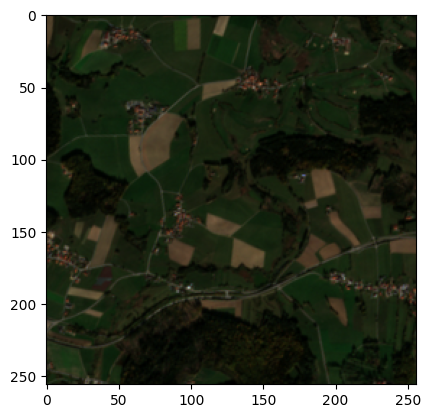

<Axes: >

In [20]:
show(image_np[1:4, :, :])

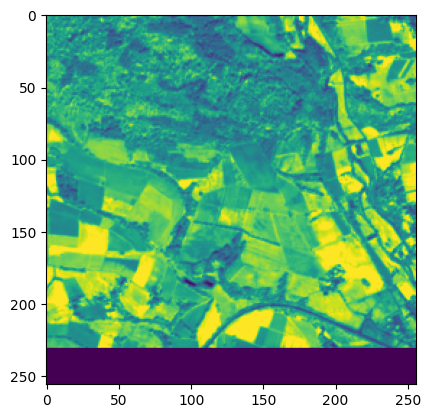

<Axes: >

In [43]:
show(image_np_old[0, :, :])

## Check out different preprocessing methods

In [42]:
path_without_color_correction = Path(r"C:\Users\Fabian\Documents\Github_Masterthesis\Solarpark-detection\data_local\refactored_images_test")
path_with_color_correction = Path(r"C:\Users\Fabian\Documents\Github_Masterthesis\Solarpark-detection\data_local\refactored_images_test_color_corrected")

In [43]:
image_without_color_correction = torch.load(path_without_color_correction / '33UVP_1_2018-10-13.pt')
image_with_color_correction = torch.load(path_with_color_correction / '33UVP_1_2018-10-13.pt')

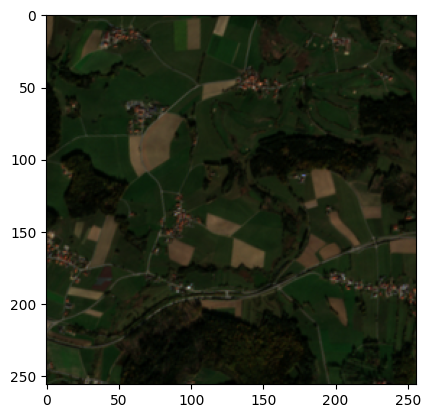

In [44]:
show(image_without_color_correction.numpy()[1:4, :, :]);

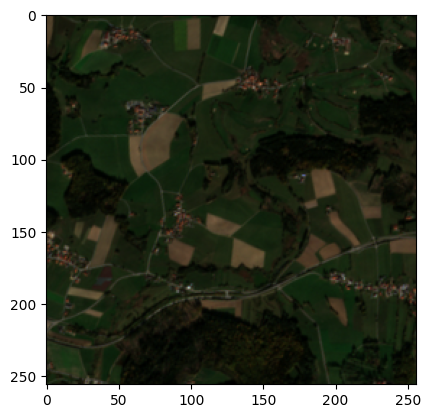

In [45]:
show(image_with_color_correction.numpy()[1:4, :, :]);

In [46]:
print(f"avg brightness with color correction: {image_with_color_correction.mean():.6f}")
print(f"avg brightness without color correction: {image_without_color_correction.mean():.6f}")

avg brightness with color correction: 0.240915
avg brightness without color correction: 0.240799


In [47]:
print(f"avg brightness with color correction B08: {image_with_color_correction[0, :, :].mean():.6f}")
print(f"avg brightness without color correction B08: {image_without_color_correction[0, :, :].mean():.6f}\n")

print(f"avg brightness with color correction B04: {image_with_color_correction[1, :, :].mean():.6f}")
print(f"avg brightness without color correction B04: {image_without_color_correction[1, :, :].mean():.6f}\n")

print(f"avg brightness with color correction B03: {image_with_color_correction[2, :, :].mean():.6f}")
print(f"avg brightness without color correction B03: {image_without_color_correction[2, :, :].mean():.6f}\n")

print(f"avg brightness with color correction B02: {image_with_color_correction[3, :, :].mean():.6f}")
print(f"avg brightness without color correction B02: {image_without_color_correction[3, :, :].mean():.6f}")

avg brightness with color correction B08: 0.656167
avg brightness without color correction B08: 0.656052

avg brightness with color correction B04: 0.108740
avg brightness without color correction B04: 0.108621

avg brightness with color correction B03: 0.132295
avg brightness without color correction B03: 0.132174

avg brightness with color correction B02: 0.066457
avg brightness without color correction B02: 0.066348


In [49]:
avg_brightness_with_color_correction = []
for file_path in path_with_color_correction.iterdir():
    image = torch.load(file_path)
    avg_brightness_with_color_correction.append(image.mean())

In [50]:
avg_brightness_without_color_correction = []
for file_path in path_without_color_correction.iterdir():
    image = torch.load(file_path)
    avg_brightness_without_color_correction.append(image.mean())

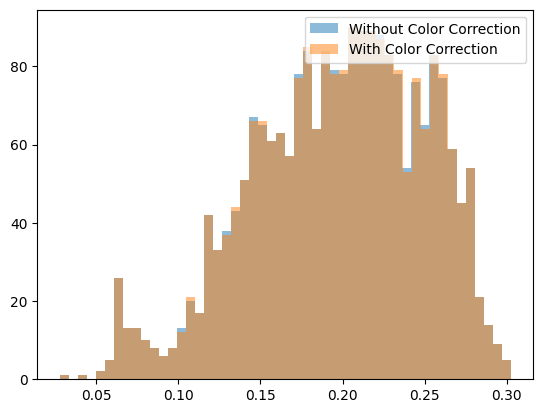

In [51]:
plt.hist(avg_brightness_without_color_correction, bins=50, alpha=0.5, label='Without Color Correction')
plt.hist(avg_brightness_with_color_correction, bins=50, alpha=0.5, label='With Color Correction')
plt.legend(loc='upper right')
plt.show()

In [54]:
# Calculate statistics for both lists
mean_without = np.mean(avg_brightness_without_color_correction)
mean_with = np.mean(avg_brightness_with_color_correction)

median_without = np.median(avg_brightness_without_color_correction)
median_with = np.median(avg_brightness_with_color_correction)

std_dev_without = np.std(avg_brightness_without_color_correction)
std_dev_with = np.std(avg_brightness_with_color_correction)

# Print the statistics
print(f"Mean brightness without color correction: {mean_without:.6f}")
print(f"Mean brightness with color correction: {mean_with:.6f}\n")

print(f"Median brightness without color correction: {median_without:.6f}")
print(f"Median brightness with color correction: {median_with:.6f}\n")

print(f"Standard deviation of brightness without color correction: {std_dev_without:.6f}")
print(f"Standard deviation of brightness with color correction: {std_dev_with:.6f}\n")

Mean brightness without color correction: 0.196992
Mean brightness with color correction: 0.197104

Median brightness without color correction: 0.201113
Median brightness with color correction: 0.201223

Standard deviation of brightness without color correction: 0.052434
Standard deviation of brightness with color correction: 0.052447



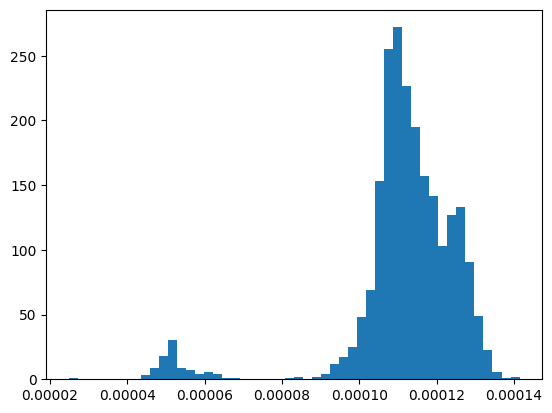

In [55]:
# Calculate the difference
difference = np.array(avg_brightness_with_color_correction) - np.array(avg_brightness_without_color_correction)

# Analyze the difference
plt.hist(difference, bins=50)
plt.show()